In [1]:
import os
import sys
sys.path.append("..")  # add top folder to path

from pathlib import Path

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from moses.metrics.utils import get_mol, mol_passes_filters, logP, QED, SA, weight

### Keep only molecules with measured IC50

In [2]:
ccr5_train_meta = pd.read_csv("/Users/Munchic/Developer/Capstone/tinymolecule_old/data/ccr5_ic50_meta.csv")
ccr5_train_meta.dropna(subset=["standard_value", "canonical_smiles"], inplace=True)
ccr5_train_meta.reset_index(inplace=True, drop=True)
ccr5_train_meta.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,335.0
1,NaN,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,28.0
2,NaN,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,10.0
3,NaN,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,BAO_0000190,BAO_0000219,cell-based format,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,35.0
4,NaN,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.0


In [3]:
mol_objs = [get_mol(smi) for smi in ccr5_train_meta["canonical_smiles"]]

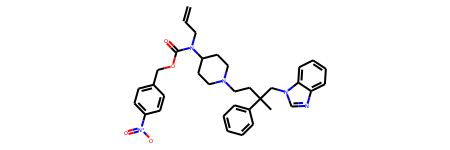

In [78]:
mol_objs[2]

<Figure size 660x660 with 0 Axes>

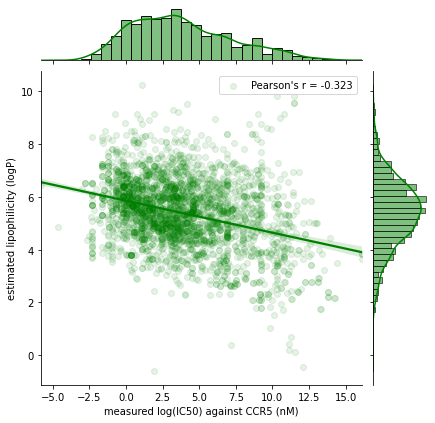

In [62]:
plt.figure(figsize=(2, 2), dpi=330)

x = np.log(ccr5_train_meta["standard_value"])
y = [logP(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="green", scatter_kws={"alpha": 0.1})

plt.xlabel(f"measured log(IC50) against CCR5 (nM)")
plt.ylabel(f"estimated lipophilicity (logP)")
plt.legend()
plt.show()

<Figure size 660x660 with 0 Axes>

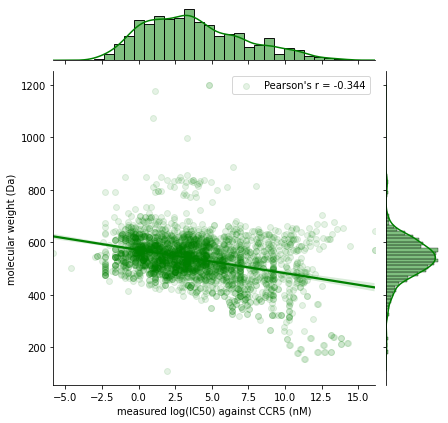

In [63]:
plt.figure(figsize=(2, 2), dpi=330)

x = np.log(ccr5_train_meta["standard_value"])  * (-1)
y = [weight(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="green", scatter_kws={"alpha": 0.1})

plt.xlabel(f"measured log(IC50) against CCR5 (nM)")
plt.ylabel(f"molecular weight (Da)")
plt.legend()
plt.show()

<Figure size 660x660 with 0 Axes>

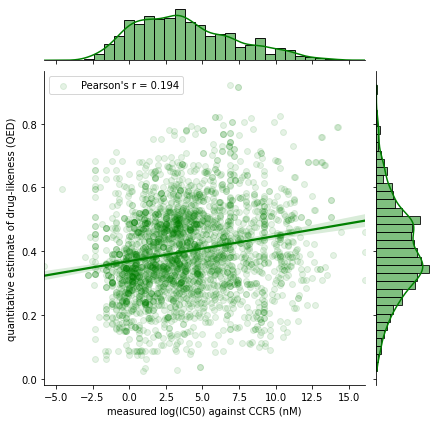

In [67]:
plt.figure(figsize=(2, 2), dpi=330)

x = np.log(ccr5_train_meta["standard_value"])
y = [QED(mol) for mol in mol_objs]
r = stats.pearsonr(x, y)[0]

sns.jointplot(x, y, kind="reg", label=f"Pearson's r = {round(r, 3)}", color="green", scatter_kws={"alpha": 0.1})

plt.xlabel(f"measured log(IC50) against CCR5 (nM)")
plt.ylabel(f"quantitative estimate of drug-likeness (QED)")
plt.legend()
plt.show()

In [ ]:
ge